In [82]:
import findspark
import pandas

findspark.init()

In [83]:
#pip install pandas
#!pip install matplotlib

In [84]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf, when, last, split
from pyspark.sql.types import StringType, DoubleType
from pyspark.sql.window import Window

In [85]:
spark = SparkSession.builder.appName("Projekt").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

In [86]:
obroty = spark.read.parquet("hdfs://localhost:8020/user/projekt/obroty_transform.csv")

In [87]:
df = obroty.withColumn("total_value", obroty["total_value"].cast(DoubleType()).alias("total_value")) \
    .groupBy('kraj').sum('total_value').orderBy('sum(total_value)', ascending=False).limit(11).toPandas()
df = df.loc[1:11]

In [88]:
df = obroty.filter(obroty['typ']=='sekcja').filter(obroty['kraj'].isin(kraje)).toPandas()

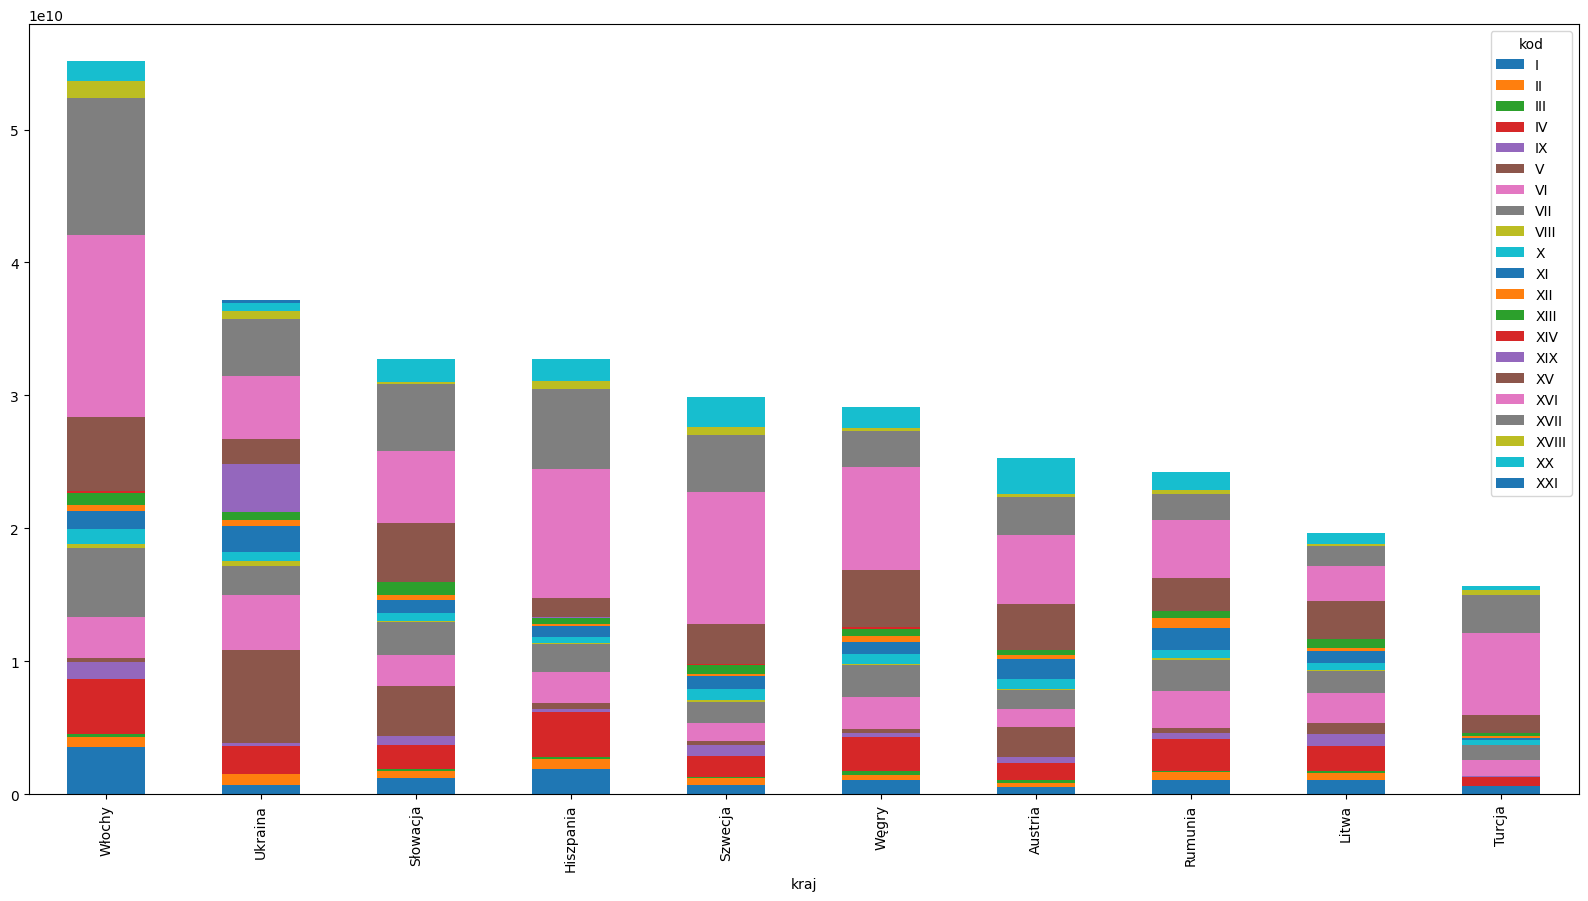

In [89]:
import matplotlib.pyplot as plt

df.pivot(index='kraj', columns='kod', values='total_value').astype('float').loc[kraje, :].plot(kind='bar', stacked=True,  figsize=(20, 10))
plt.show()

In [81]:
df[['kod', 'opis']].drop_duplicates()

,kod,opis
0,I,ZWIERZĘTA ŻYWE; PRODUKTY POCHODZENIA ZWIERZĘCEGO
1,II,PRODUKTY POCHODZENIA ROŚLINNEGO
2,III,"TŁUSZCZE I OLEJE ZWIERZĘCE, ROŚLINNE LUB MIKRO..."
3,IV,"GOTOWE ART. SPOŻ.; NAPOJE BEZALKOHOL., ALKOHOL..."
4,V,PRODUKTY MINERALNE
5,VI,PRODUKTY PRZEMYSŁU CHEMICZNEGO LUB PRZEMYSŁÓW ...
6,VII,TWORZYWA SZTUCZNE I ARTYKUŁY Z NICH; KAUCZUK I...
7,VIII,"SKÓRY I SKÓRKI SUROWE, WYPRAWIONE, FUTERKOWE I..."
8,IX,DREWNO I ART. Z DREWNA; WĘGIEL DRZEWNY; KOREK ...
9,X,MASA WŁÓKNISTA Z DREWNA LUB Z POZ. WŁÓKNISTEGO...
